In [1]:
import pandas as pd
import numpy as np
import datetime 
import pandas_datareader as pdr
import matplotlib.pyplot as plt

/Users/miaoyuesun/anaconda3/envs/py36/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
# 导入apple公司股票数据
ticker_list=['SGOL','HUC.TO']
SGOL = pdr.get_data_yahoo('SGOL', 
                          start=datetime.datetime(2009, 10, 31), 
                          end=datetime.datetime(2012, 1, 1))

In [3]:
SGOL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-10-30,10.466,10.351,10.434,10.455,423000,10.455
2009-11-02,10.628,10.537,10.553,10.596,434000,10.596
2009-11-03,10.876,10.578,10.579,10.855,1395000,10.855
2009-11-04,10.970,10.865,10.923,10.916,1076000,10.916
2009-11-05,10.929,10.871,10.892,10.908,787000,10.908
...,...,...,...,...,...,...
2011-12-23,15.948,15.884,15.930,15.934,391000,15.934
2011-12-27,15.852,15.756,15.801,15.788,830000,15.788
2011-12-28,15.722,15.365,15.698,15.396,1285000,15.396


In [4]:
HUCTO = pdr.get_data_yahoo('HUC.TO', 
                          start=datetime.datetime(2009, 11, 1), 
                          end=datetime.datetime(2012, 1, 1))

In [5]:
HUCTO

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-11-02,21.440001,21.440001,21.440001,21.440001,0,21.440001
2009-11-03,21.440001,21.440001,21.440001,21.440001,0,21.440001
2009-11-04,22.299999,22.299999,22.299999,22.299999,100,22.299999
2009-11-05,23.299999,22.120001,23.299999,22.139999,5600,22.139999
2009-11-06,21.500000,21.440001,21.440001,21.500000,200,21.500000
...,...,...,...,...,...,...
2011-12-22,22.580000,22.440001,22.440001,22.459999,7400,22.459999
2011-12-23,22.600000,22.500000,22.500000,22.600000,300,22.600000
2011-12-28,22.719999,22.420000,22.719999,22.420000,3200,22.420000


In [7]:
daily_close1 = SGOL[['Adj Close']]
daily_close2 = HUCTO[['Adj Close']]

In [8]:
daily_close1

,Adj Close
Date,
2009-10-30,10.455
2009-11-02,10.596
2009-11-03,10.855
2009-11-04,10.916
2009-11-05,10.908
...,...
2011-12-23,15.934
2011-12-27,15.788
2011-12-28,15.396


In [9]:
daily_close2

,Adj Close
Date,
2009-11-02,21.440001
2009-11-03,21.440001
2009-11-04,22.299999
2009-11-05,22.139999
2009-11-06,21.500000
...,...
2011-12-22,22.459999
2011-12-23,22.600000
2011-12-28,22.420000


In [10]:
result = pd.concat([daily_close1, daily_close2], axis=1, sort=False)

In [15]:
# 问题出在了你之前没有drop掉NaN值

result.dropna(inplace =True)

In [33]:
result1, result2 = result.iloc[:,0], result.iloc[:, 1]

In [18]:
result_corr = result.rolling(window=252).corr(pairwise=True)

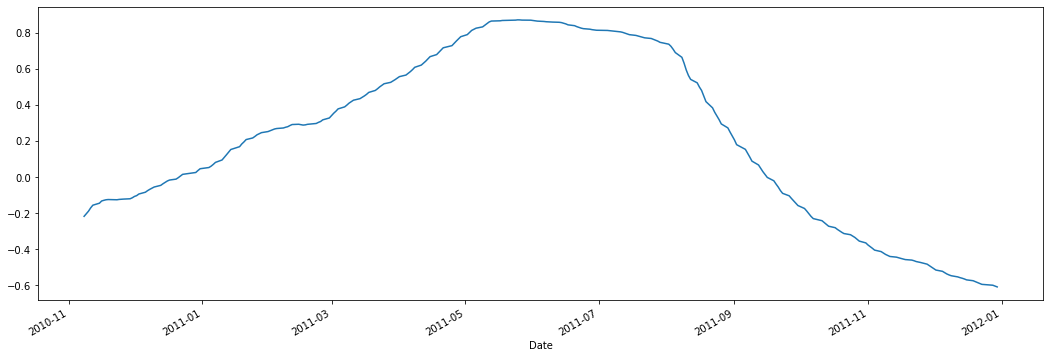

In [39]:
result1.rolling(window=252).corr(result2).plot(figsize = (18,6))